In [1]:
import pandas as pd

In [2]:

import os

# Directory containing your Excel files
roi_directory = "C:\\Users\\loges\\Downloads\\regions_of_interest"

# List all Excel files in the directory
excel_files = [f for f in os.listdir(roi_directory) if f.endswith('.xlsx') or f.endswith('.xls')]

# Initialize an empty list to store individual dataframes
dfs = []

# Iterate through each file and append its content to the dfs list
for file in excel_files:
    file_path = os.path.join(roi_directory, file)
    dfs.append(pd.read_excel(file_path, engine='openpyxl'))

# Concatenate all the dataframes into a single dataframe
final_df = pd.concat(dfs, ignore_index=True)


In [3]:
final_df.shape

(24651, 117)

In [4]:
import pandas as pd

# Example dataframe structure
df_label = pd.read_excel(r'frogId_label_noise.xlsx', sheet_name="Sheet2")

df_label.head()

,File No,Rhinella marina,Pristimantis achatinus,Hysiboas boans,Pristimantis subsigillatus,Pristimantis labiosus,Barycholos pulcher,Rhaebo haematiticus,Hypsiboas rosenbergi,Smilisca phaeota,Pristimantis walkeri,Espadarrana prosoblepon,Hyalinobatrahium aureoguttatum,Hyalinobatrachium fleischmanni,Hyalinobatrachium chirripoi,Hypsiboas picturatus,Epipedobates boulengeri,Hyloxalus toachi,Teratohyla spinosa
0,1,0.0,0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0.0,0
1,2,0.0,0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0.0,0
2,3,0.0,2,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0.0,0
3,4,0.0,0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0.0,0
4,5,0.0,4,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0.0,0


In [5]:
label_columns = [col for col in df_label.columns if col != 'File No']
print(label_columns)
# Initialize an empty dictionary to store the matrix-like representation
label_to_number = {label: index + 1 for index, label in enumerate(label_columns)}
label_to_number

['Rhinella marina', 'Pristimantis achatinus', 'Hysiboas boans', 'Pristimantis subsigillatus', 'Pristimantis labiosus', 'Barycholos pulcher', 'Rhaebo haematiticus', 'Hypsiboas rosenbergi', 'Smilisca phaeota', 'Pristimantis walkeri', 'Espadarrana prosoblepon', 'Hyalinobatrahium aureoguttatum', 'Hyalinobatrachium fleischmanni', 'Hyalinobatrachium chirripoi', 'Hypsiboas picturatus', 'Epipedobates boulengeri', 'Hyloxalus toachi', 'Teratohyla spinosa']


{'Rhinella marina': 1,
 'Pristimantis achatinus': 2,
 'Hysiboas boans': 3,
 'Pristimantis subsigillatus': 4,
 'Pristimantis labiosus': 5,
 'Barycholos pulcher': 6,
 'Rhaebo haematiticus': 7,
 'Hypsiboas rosenbergi': 8,
 'Smilisca phaeota': 9,
 'Pristimantis walkeri': 10,
 'Espadarrana prosoblepon': 11,
 'Hyalinobatrahium aureoguttatum': 12,
 'Hyalinobatrachium fleischmanni': 13,
 'Hyalinobatrachium chirripoi': 14,
 'Hypsiboas picturatus': 15,
 'Epipedobates boulengeri': 16,
 'Hyloxalus toachi': 17,
 'Teratohyla spinosa': 18}

In [6]:
matrix_data={}
# Iterate through each row in the dataframe
for index, row in df_label.iterrows():
    filename = row['File No']
    labels = [label_to_number[col] for col in label_columns if row[col] >0]
    matrix_data[ str(int(filename)) + ".wav" ] = labels

# Create a new dataframe from the matrix data
matrix_df = pd.DataFrame.from_dict(matrix_data, orient='index')

# Fill NaN values with 0
matrix_df.fillna(0, inplace=True)

In [7]:
matrix_df= matrix_df.rename_axis("filename")

In [8]:
matrix_df

,0,1,2,3,4,5
filename,,,,,,
1.wav,0.0,0.0,0.0,0.0,0.0,0.0
2.wav,0.0,0.0,0.0,0.0,0.0,0.0
3.wav,2.0,0.0,0.0,0.0,0.0,0.0
4.wav,0.0,0.0,0.0,0.0,0.0,0.0
5.wav,2.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2696.wav,0.0,0.0,0.0,0.0,0.0,0.0
2697.wav,0.0,0.0,0.0,0.0,0.0,0.0
2698.wav,4.0,0.0,0.0,0.0,0.0,0.0


In [9]:
mask = (matrix_df[0] != 0) & (matrix_df.drop(0, axis=1) == 0).all(axis=1)

In [10]:
filtered_df = matrix_df[mask]


In [11]:
columns_to_drop = [1,2,3,4,5]
filtered_df.drop(columns_to_drop, axis=1, inplace=True)

C:\Users\loges\AppData\Local\Temp\ipykernel_47428\772494192.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop(columns_to_drop, axis=1, inplace=True)


In [12]:
filtered_df

,0
filename,
3.wav,2.0
5.wav,2.0
9.wav,5.0
11.wav,4.0
12.wav,2.0
...,...
2692.wav,5.0
2694.wav,2.0
2695.wav,3.0


In [13]:
merged_features = final_df.merge(filtered_df, on='filename', how='left')
merged_features = merged_features.rename (columns = { 0 :"label"})
merged_features["label"].fillna(-1, inplace = True) 

In [14]:
# merged_features.to_excel("C:\\Users\\lv228\\Downloads\\machine.xlsx" ,index=False,engine='openpyxl')

In [15]:
merged_features["label"].value_counts()

-1.0     16534
 2.0      5166
 5.0      1420
 4.0       414
 3.0       396
 16.0      215
 6.0       194
 1.0       155
 7.0        75
 14.0       30
 13.0       18
 15.0       15
 17.0       12
 8.0         4
 10.0        3
Name: label, dtype: int64

In [16]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import plotly.express as px

features = merged_features.iloc[:, :-2]
labels = merged_features.iloc[:, -1]

# It's important to scale the data before applying PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

# Apply PCA
# The number of components can be set based on the variance you wish to retain
# For demonstration purposes, let's say you want to reduce it to 50 components
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(scaled_data)

pc_df = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3'])

# Append labels to the reduced dimensions
pc_df['Label'] = labels
# Mark unlabeled data as "Unlabeled" for visualization purposes
pc_df['Label'] = pc_df['Label'].replace(-1, "Unlabeled")

# Visualize using Plotly
fig = px.scatter_3d(pc_df, x='PC1', y='PC2', z='PC3', color='Label', opacity=0.7)

# Set the theme and show the plot
fig.update_layout(title='3D visualization of Labeled and Unlabeled Data')
fig.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# Split data into features and labels
X = merged_features.iloc[:, :-2]
y = merged_features.iloc[:, -1]

# Split the data into labeled and unlabeled datasets
X_labeled, X_unlabeled = X[y != -1], X[y == -1]
y_labeled = y[y != -1]



# Initialize the encoder
encoder = LabelEncoder()

# Fit the encoder and transform y
y_encoded = encoder.fit_transform(y_labeled)

# Now use y_encoded in place of y for training and testing

# Split labeled data for training and evaluation
X_train, X_test, y_train, y_test = train_test_split(X_labeled, y_encoded, test_size=0.2, random_state=42)



In [18]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix , accuracy_score



def benchmark(clf, custom_name=False):
    print("_" * 80)
    print("Training: ")
    print(clf)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    score = accuracy_score(y_test, pred)
    print(f"accuracy:   {score:.3}")
    conf_matrix = confusion_matrix(y_test, pred)
    print("Confusion Matrix:")
    print(conf_matrix)
    if custom_name:
        clf_descr = str(custom_name)
    else:
        clf_descr = clf.__class__.__name__
    
    return clf_descr,score, conf_matrix


In [19]:

results = []
for clf, name in (
    (KNeighborsClassifier(n_neighbors=10), "kNN"),
    (RandomForestClassifier(), "Random Forest"),
    (XGBClassifier(), "XGBoost"),

):
    print("=" * 80)
    print(name)
    results.append(benchmark(clf, name))

kNN
________________________________________________________________________________
Training: 
KNeighborsClassifier(n_neighbors=10)
accuracy:   0.686
Confusion Matrix:
[[  0  14   0   1  15   0   0   0   0   0   0   0   0]
 [  3 942  13   5  46   4   1   0   0   0   0   0   0]
 [  0  69   9   0   3   0   0   0   0   0   0   0   0]
 [  0  41   4   8  28   0   0   0   0   0   0   0   0]
 [  1 126   3   7 144   4   2   0   0   0   0   3   0]
 [  0  35   0   1   5   8   0   0   0   0   0   0   0]
 [  0   8   0   0  12   0   1   0   0   0   0   0   0]
 [  0   0   1   0   0   0   0   0   0   0   0   0   0]
 [  0   1   3   0   0   0   0   0   0   0   0   0   0]
 [  0   5   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   3   0   0   0   0   0   0   0   0]
 [  1  39   0   0   0   0   0   0   0   0   0   2   0]
 [  0   1   0   0   1   1   0   0   0   0   0   0   0]]
Random Forest
________________________________________________________________________________
Training: 
RandomFor

In [20]:
class_labels=[]
available_labels = [1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,10.0,13.0,14.0,15.0,16.0,17.0]

def get_key_from_value(my_dict, target_value):
    for key, value in my_dict.items():
        if value == target_value:
            return key
    return None
class_labels = [get_key_from_value(label_to_number,value) for  value in available_labels]
class_labels

['Rhinella marina',
 'Pristimantis achatinus',
 'Hysiboas boans',
 'Pristimantis subsigillatus',
 'Pristimantis labiosus',
 'Barycholos pulcher',
 'Rhaebo haematiticus',
 'Hypsiboas rosenbergi',
 'Pristimantis walkeri',
 'Hyalinobatrachium fleischmanni',
 'Hyalinobatrachium chirripoi',
 'Hypsiboas picturatus',
 'Epipedobates boulengeri',
 'Hyloxalus toachi']

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_confusion_matrix(classifier_name, cm, accuracy, class_labels):
    # Calculate precision, recall and f1 score for each class
    true_pos = np.diag(cm)
    false_pos = np.sum(cm, axis=0) - true_pos
    false_neg = np.sum(cm, axis=1) - true_pos
    
    # precision_per_class = true_pos / (true_pos + false_pos)
    # recall_per_class = true_pos / (true_pos + false_neg)
    # f1_per_class = 2 * (precision_per_class * recall_per_class) / (precision_per_class + recall_per_class)

    # Handle cases where true_pos + false_pos or true_pos + false_neg is 0
    precision_per_class = np.where((true_pos + false_pos) == 0, 0, true_pos / (true_pos + false_pos))
    recall_per_class = np.where((true_pos + false_neg) == 0, 0, true_pos / (true_pos + false_neg))
    f1_per_class = np.where((precision_per_class + recall_per_class) == 0, 0, 
                            2 * (precision_per_class * recall_per_class) / (precision_per_class + recall_per_class))
    
    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix for {classifier_name} \nAccuracy: {accuracy:.2f}')
    
    # Display precision, recall, f1 score table
    metrics_data = {'Precision': precision_per_class, 'Recall': recall_per_class, 'F1 Score': f1_per_class}
    metrics_df = pd.DataFrame(metrics_data, index=class_labels)
    print("\nMetrics for each class:")
    print(metrics_df)

    plt.show()




kNN 0.6859605911330049


C:\Users\loges\AppData\Local\Temp\ipykernel_47428\50568641.py:17: RuntimeWarning:

invalid value encountered in divide

C:\Users\loges\AppData\Local\Temp\ipykernel_47428\50568641.py:20: RuntimeWarning:

invalid value encountered in divide




Metrics for each class:
                                Precision    Recall  F1 Score
Rhinella marina                  0.000000  0.000000  0.000000
Pristimantis achatinus           0.735363  0.928994  0.820915
Hysiboas boans                   0.272727  0.111111  0.157895
Pristimantis subsigillatus       0.363636  0.098765  0.155340
Pristimantis labiosus            0.560311  0.496552  0.526508
Barycholos pulcher               0.470588  0.163265  0.242424
Rhaebo haematiticus              0.250000  0.047619  0.080000
Hypsiboas rosenbergi             0.000000  0.000000  0.000000
Pristimantis walkeri             0.000000  0.000000  0.000000
Hyalinobatrachium fleischmanni   0.000000  0.000000  0.000000
Hyalinobatrachium chirripoi      0.000000  0.000000  0.000000
Hypsiboas picturatus             0.400000  0.047619  0.085106
Epipedobates boulengeri          0.000000  0.000000  0.000000


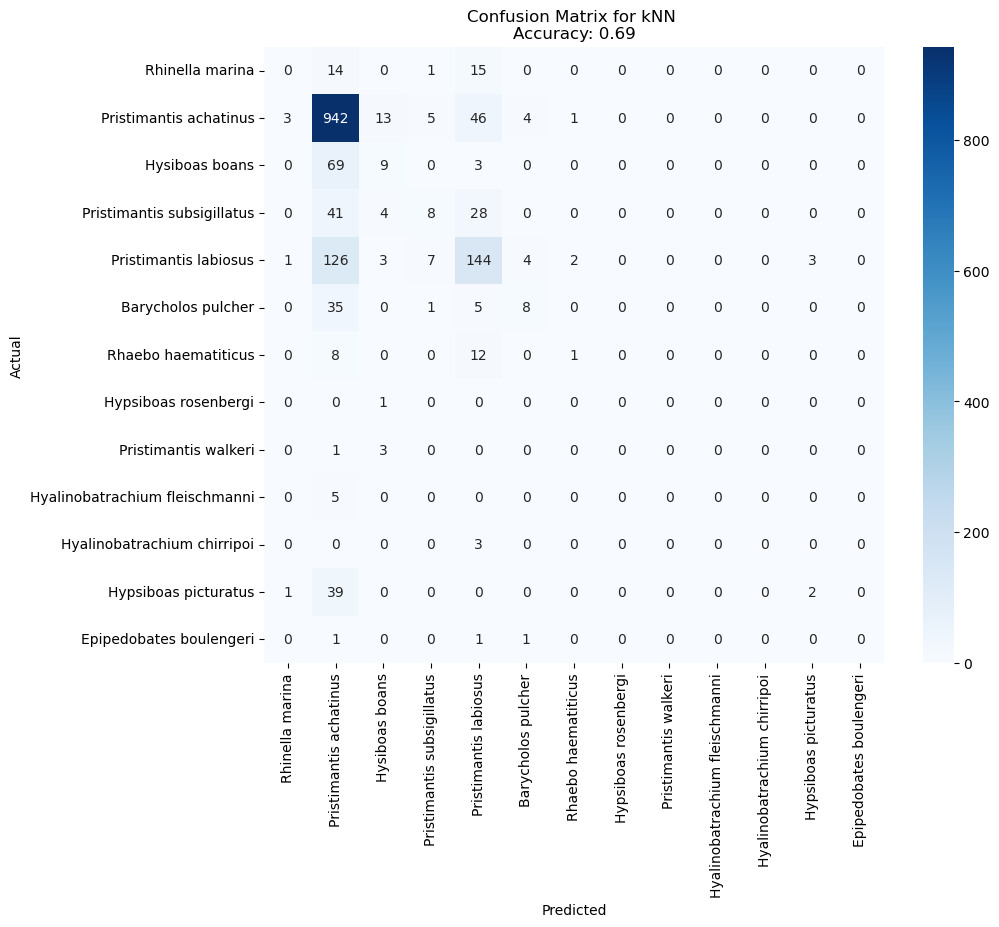

Random Forest 0.8552955665024631

Metrics for each class:
                                Precision    Recall  F1 Score
Rhinella marina                  1.000000  0.433333  0.604651
Pristimantis achatinus           0.858874  0.978304  0.914707
Hysiboas boans                   0.904762  0.703704  0.791667
Pristimantis subsigillatus       0.947368  0.444444  0.605042
Pristimantis labiosus            0.795918  0.806897  0.801370
Barycholos pulcher               0.928571  0.530612  0.675325
Rhaebo haematiticus              1.000000  0.476190  0.645161
Hypsiboas rosenbergi             0.000000  0.000000  0.000000
Pristimantis walkeri             1.000000  0.500000  0.666667
Hyalinobatrachium fleischmanni   1.000000  0.200000  0.333333
Hyalinobatrachium chirripoi      1.000000  1.000000  1.000000
Hypsiboas picturatus             0.882353  0.357143  0.508475
Epipedobates boulengeri          0.000000  0.000000  0.000000


C:\Users\loges\AppData\Local\Temp\ipykernel_47428\50568641.py:17: RuntimeWarning:

invalid value encountered in divide

C:\Users\loges\AppData\Local\Temp\ipykernel_47428\50568641.py:20: RuntimeWarning:

invalid value encountered in divide



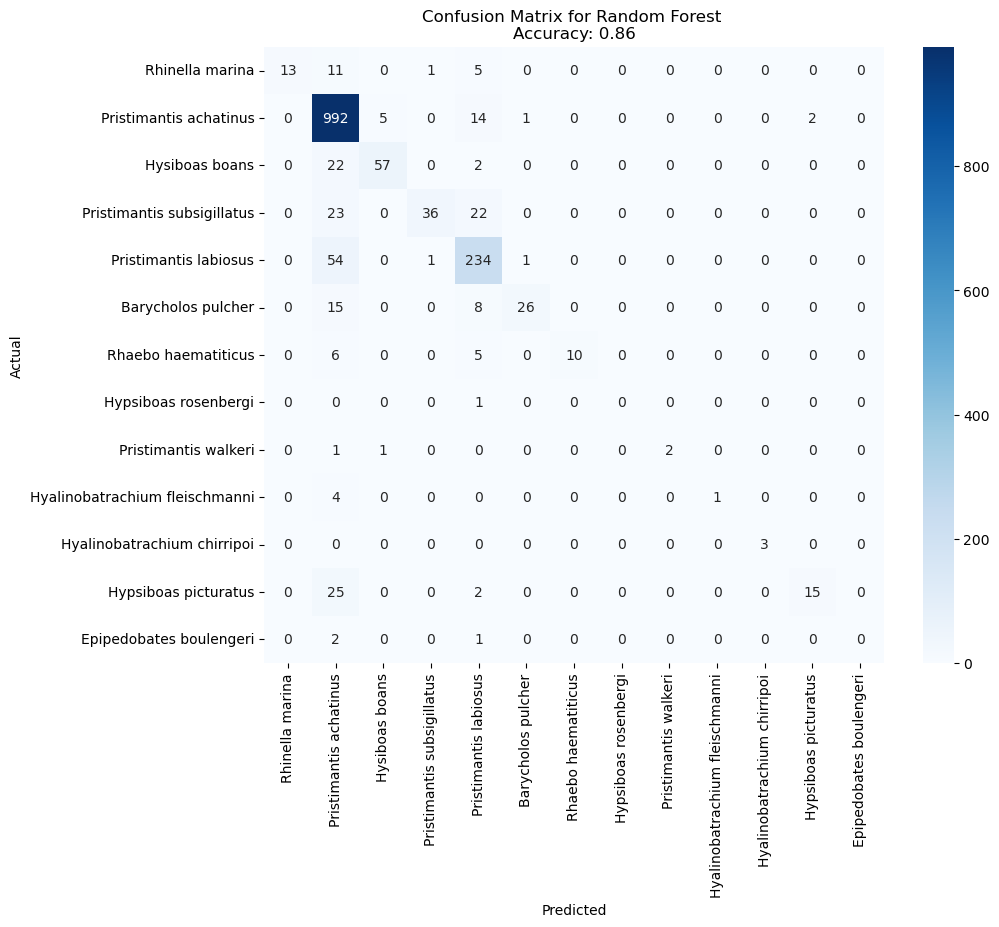

XGBoost 0.8860837438423645

Metrics for each class:
                                Precision    Recall  F1 Score
Rhinella marina                  0.947368  0.600000  0.734694
Pristimantis achatinus           0.903636  0.980276  0.940397
Hysiboas boans                   0.984127  0.765432  0.861111
Pristimantis subsigillatus       0.807018  0.567901  0.666667
Pristimantis labiosus            0.807818  0.855172  0.830821
Barycholos pulcher               0.861111  0.632653  0.729412
Rhaebo haematiticus              1.000000  0.476190  0.645161
Hypsiboas rosenbergi             0.000000  0.000000  0.000000
Pristimantis walkeri             1.000000  0.500000  0.666667
Hyalinobatrachium fleischmanni   1.000000  0.200000  0.333333
Hyalinobatrachium chirripoi      1.000000  1.000000  1.000000
Hypsiboas picturatus             0.923077  0.571429  0.705882
Epipedobates boulengeri          0.000000  0.000000  0.000000


C:\Users\loges\AppData\Local\Temp\ipykernel_47428\50568641.py:17: RuntimeWarning:

invalid value encountered in divide

C:\Users\loges\AppData\Local\Temp\ipykernel_47428\50568641.py:20: RuntimeWarning:

invalid value encountered in divide



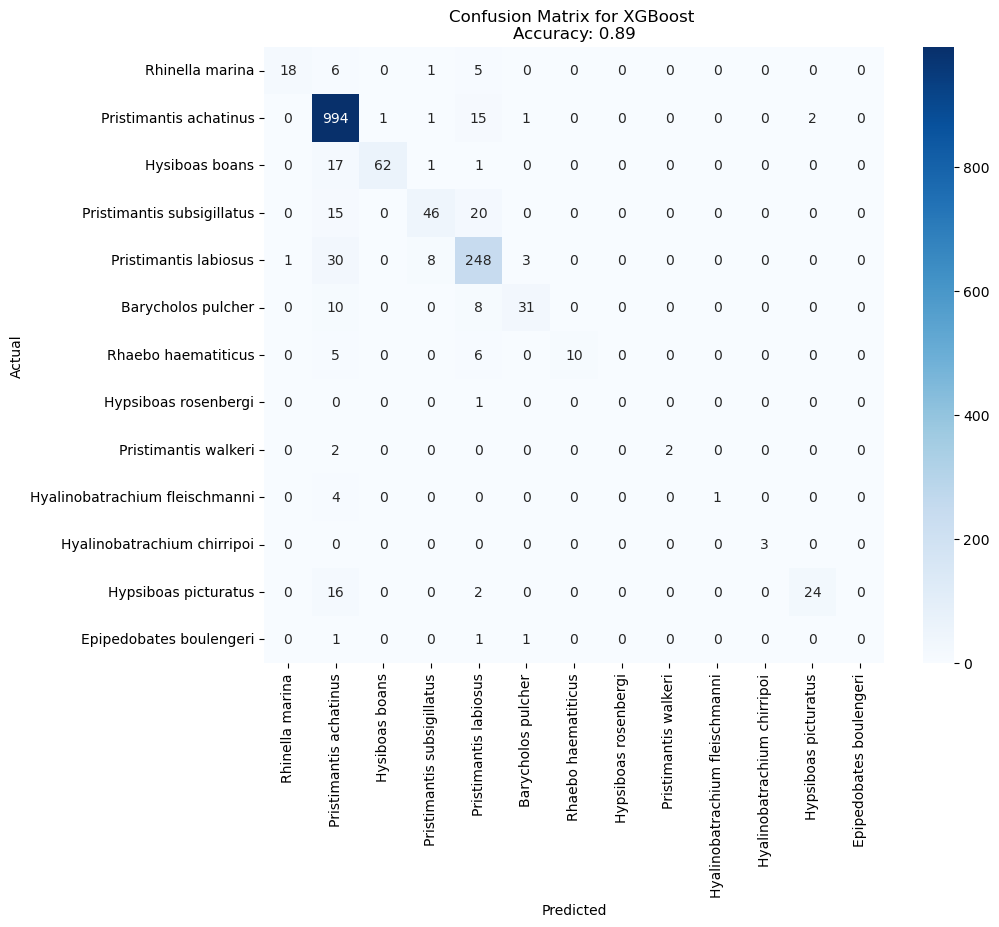

In [22]:
for classifier_result in results:
    name= classifier_result[0]
    accuracy = classifier_result[1]
    cm= classifier_result[2]
    print(name,accuracy)
    plot_confusion_matrix(name,cm,accuracy,class_labels[:len(cm[0])])

In [23]:

clf = XGBClassifier()
clf.fit(X_train, y_train)

# Predict class probabilities on unlabeled data
probs_unlabeled = clf.predict_proba(X_unlabeled)
# Take the max probability for each sample to determine confidence
max_probs = probs_unlabeled.max(axis=1)

# Define a threshold for confident predictions
threshold = 0.9
confident_samples = max_probs > threshold

# Pseudo labeling for confident predictions
pseudo_labels_confident = clf.predict(X_unlabeled[confident_samples])
y_train_series = pd.Series(y_train)
pseudo_labels_confident_series = pd.Series(pseudo_labels_confident, index=X_unlabeled[confident_samples].index)

# Combine labeled data and confident pseudo-labeled data
X_combined = pd.concat([X_train, X_unlabeled[confident_samples]])
y_combined = pd.concat([y_train_series, pseudo_labels_confident_series])


# Retrain model on combined data
clf.fit(X_combined, y_combined)

# Prediction & Evaluation
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with confident pseudo-labeling and XGBoost: {accuracy:.4f}")

Accuracy with confident pseudo-labeling and XGBoost: 0.8651



Metrics for each class:
                                Precision    Recall  F1 Score
Rhinella marina                  0.928571  0.433333  0.590909
Pristimantis achatinus           0.880425  0.980276  0.927671
Hysiboas boans                   0.937500  0.740741  0.827586
Pristimantis subsigillatus       0.825000  0.407407  0.545455
Pristimantis labiosus            0.778846  0.837931  0.807309
Barycholos pulcher               0.937500  0.612245  0.740741
Rhaebo haematiticus              1.000000  0.333333  0.500000
Hypsiboas rosenbergi             0.000000  0.000000  0.000000
Pristimantis walkeri             1.000000  0.250000  0.400000
Hyalinobatrachium fleischmanni   0.500000  0.200000  0.285714
Hyalinobatrachium chirripoi      1.000000  1.000000  1.000000
Hypsiboas picturatus             1.000000  0.476190  0.645161
Epipedobates boulengeri          0.000000  0.000000  0.000000


C:\Users\loges\AppData\Local\Temp\ipykernel_47428\50568641.py:17: RuntimeWarning:

invalid value encountered in divide

C:\Users\loges\AppData\Local\Temp\ipykernel_47428\50568641.py:20: RuntimeWarning:

invalid value encountered in divide



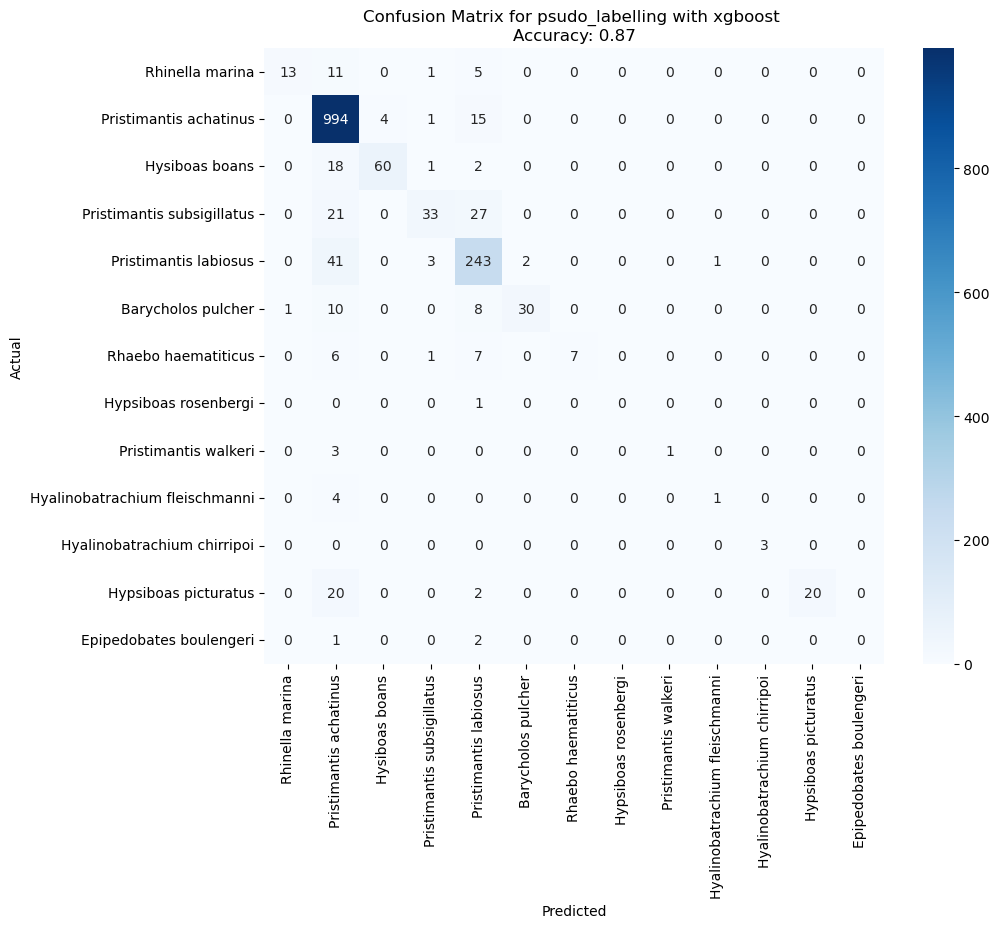

In [24]:
cm= confusion_matrix(y_test, y_pred)
plot_confusion_matrix("psudo_labelling with xgboost",cm,accuracy,class_labels[:len(cm[0])])

In [25]:
for original_label, encoded_label in enumerate(encoder.classes_):
    print(f"Original Label: {encoded_label} -> Encoded Label: {original_label}")

Original Label: 1.0 -> Encoded Label: 0
Original Label: 2.0 -> Encoded Label: 1
Original Label: 3.0 -> Encoded Label: 2
Original Label: 4.0 -> Encoded Label: 3
Original Label: 5.0 -> Encoded Label: 4
Original Label: 6.0 -> Encoded Label: 5
Original Label: 7.0 -> Encoded Label: 6
Original Label: 8.0 -> Encoded Label: 7
Original Label: 10.0 -> Encoded Label: 8
Original Label: 13.0 -> Encoded Label: 9
Original Label: 14.0 -> Encoded Label: 10
Original Label: 15.0 -> Encoded Label: 11
Original Label: 16.0 -> Encoded Label: 12
Original Label: 17.0 -> Encoded Label: 13


In [26]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

resample = Pipeline([
    ('o', SMOTE(sampling_strategy={ # define the classes to oversample
        0: 300,
        2: 500,
        3: 500,
        4: 1500,
        5: 500,
        6: 100,
        7: 10,
        8: 10,
        9: 50,
        10: 60,
        11: 50,
        12: 500,
        13: 50
    },k_neighbors= 2)),
    ('u', RandomUnderSampler(sampling_strategy={ # define the classes to undersample
        1: 1500
    }))
])

X_train_resampled, y_train_resampled = resample.fit_resample(X_train, y_train)
clf = XGBClassifier()
clf.fit(X_train_resampled, y_train_resampled)

# Predict class probabilities on unlabeled data
probs_unlabeled = clf.predict_proba(X_unlabeled)
# Take the max probability for each sample to determine confidence
max_probs = probs_unlabeled.max(axis=1)

# Define a threshold for confident predictions
threshold = 0.9
confident_samples = max_probs > threshold

# Pseudo labeling for confident predictions
pseudo_labels_confident = clf.predict(X_unlabeled[confident_samples])
y_train_series = pd.Series(y_train_resampled)
pseudo_labels_confident_series = pd.Series(pseudo_labels_confident, index=X_unlabeled[confident_samples].index)

# Combine labeled data and confident pseudo-labeled data
X_combined = pd.concat([X_train_resampled, X_unlabeled[confident_samples]])
y_combined = pd.concat([y_train_series, pseudo_labels_confident_series])

# Retrain model on combined data
clf.fit(X_combined, y_combined)

# Prediction & Evaluation
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with confident pseudo-labeling, resampling, and XGBoost: {accuracy:.4f}")

Accuracy with confident pseudo-labeling, resampling, and XGBoost: 0.8639


C:\Users\loges\AppData\Local\Temp\ipykernel_47428\50568641.py:17: RuntimeWarning:

invalid value encountered in divide

C:\Users\loges\AppData\Local\Temp\ipykernel_47428\50568641.py:20: RuntimeWarning:

invalid value encountered in divide




Metrics for each class:
                                Precision    Recall  F1 Score
Rhinella marina                  0.680000  0.566667  0.618182
Pristimantis achatinus           0.939333  0.916174  0.927609
Hysiboas boans                   0.750000  0.814815  0.781065
Pristimantis subsigillatus       0.741379  0.530864  0.618705
Pristimantis labiosus            0.727520  0.920690  0.812785
Barycholos pulcher               0.918919  0.693878  0.790698
Rhaebo haematiticus              1.000000  0.476190  0.645161
Hypsiboas rosenbergi             0.000000  0.000000  0.000000
Pristimantis walkeri             1.000000  0.500000  0.666667
Hyalinobatrachium fleischmanni   0.500000  0.200000  0.285714
Hyalinobatrachium chirripoi      1.000000  1.000000  1.000000
Hypsiboas picturatus             0.720930  0.738095  0.729412
Epipedobates boulengeri          0.000000  0.000000  0.000000


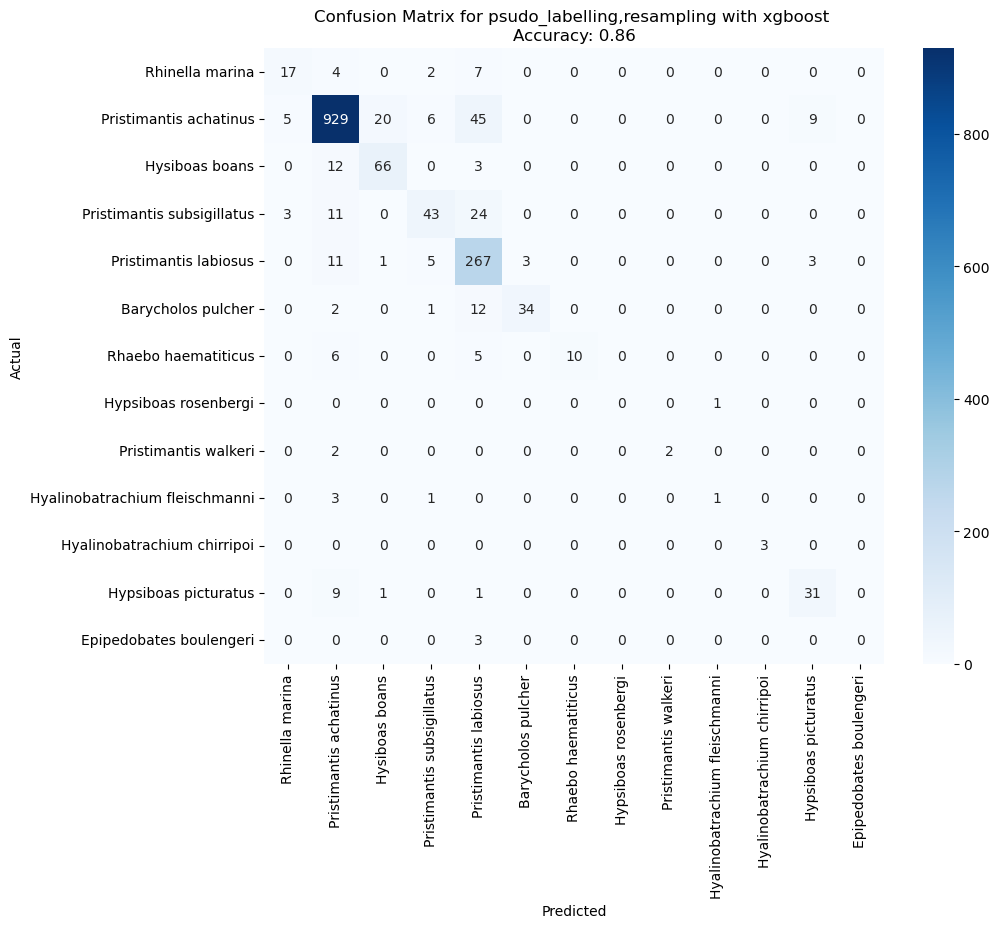

In [29]:
cm= confusion_matrix(y_test, y_pred)
plot_confusion_matrix("psudo_labelling,resampling with xgboost",cm,accuracy,class_labels[:len(cm[0])])